<a href="https://colab.research.google.com/github/MohtashamMurshid/Cats_Or_Dogs/blob/main/CatsorDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
base_dir = '/content/drive/MyDrive/cats_dogs_small/cats_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


In [4]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/cats_dogs_small/cats_dogs_small/train',
    labels = 'inferred',
    label_mode ="int",
    batch_size = 32,
    image_size = (256,256)

)
val_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/cats_dogs_small/cats_dogs_small/test',
    labels = 'inferred',
    label_mode ="int",
    batch_size = 32,
    image_size = (256,256)

)

Found 2000 files belonging to 2 classes.
Found 1010 files belonging to 2 classes.


In [5]:
#because its stored in a numpy array which only contains 0-255 elements
#to Normalize
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = val_ds.map(process)

In [6]:

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
63/63 [==============================] - 839s 12s/step - loss: 5.6129 - accuracy: 0.5620 - val_loss: 354.8023 - val_accuracy: 0.4812
Epoch 2/10
63/63 [==============================] - 15s 222ms/step - loss: 2.6703 - accuracy: 0.5750 - val_loss: 302.1484 - val_accuracy: 0.5050
Epoch 3/10
63/63 [==============================] - 14s 202ms/step - loss: 1.5330 - accuracy: 0.5640 - val_loss: 62.1156 - val_accuracy: 0.5059
Epoch 4/10
63/63 [==============================] - 14s 196ms/step - loss: 0.8402 - accuracy: 0.5960 - val_loss: 35.0284 - val_accuracy: 0.5079
Epoch 5/10
63/63 [==============================] - 13s 195ms/step - loss: 0.7198 - accuracy: 0.6350 - val_loss: 58.2439 - val_accuracy: 0.4921
Epoch 6/10
63/63 [==============================] - 14s 202ms/step - loss: 0.6631 - accuracy: 0.6795 - val_loss: 108.6470 - val_accuracy: 0.5218
Epoch 7/10
63/63 [==============================] - 12s 181ms/step - loss: 0.6368 - accuracy: 0.6955 - val_loss: 158.5897 - val_accura

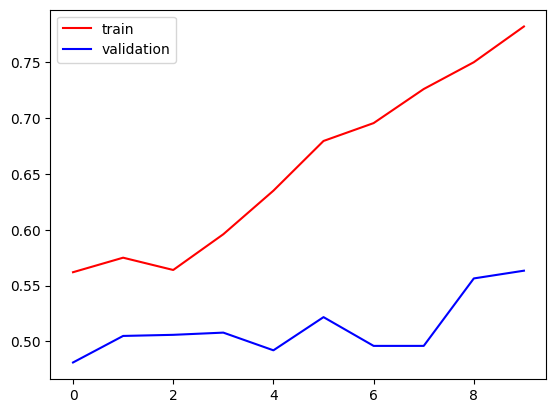

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
import cv2

In [12]:
test_img = cv2.imread('/content/drive/MyDrive/pexels-svetozar-milashevich-99573-1490908.jpg')

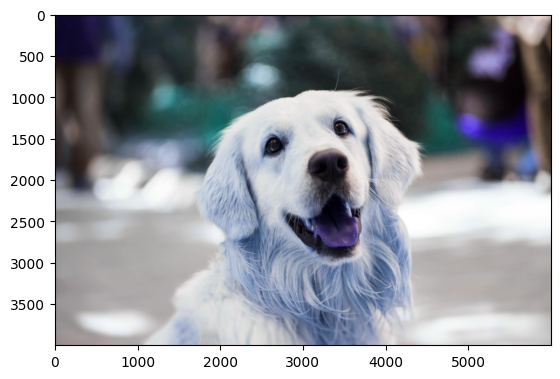

In [13]:
plt.imshow(test_img)

In [14]:
test_img.shape

(4000, 6000, 3)

In [15]:
test_img = cv2.resize(test_img,(256,256))

In [16]:
test_input = test_img.reshape((1,256,256,3))

In [17]:
model.predict(test_input)

1/1 [==============================] - 0s 421ms/step


array([[0.]], dtype=float32)

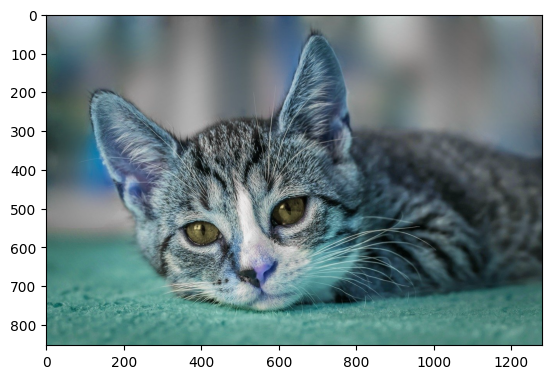

In [18]:
test_img_cat = cv2.imread('/content/drive/MyDrive/european-shorthair-8601492_1280.jpg')
plt.imshow(test_img_cat)

In [19]:
test_img_cat.shape
test_img = cv2.resize(test_img_cat,(256,256))
test_input_image_cat = test_img.reshape((1,256,256,3))

In [20]:
model.predict(test_input_image_cat)

1/1 [==============================] - 0s 28ms/step


array([[0.]], dtype=float32)